Project 2: In depth EDA - Netflix content anlysis

Project Objective: To perform an EDA of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# If it's directly a CSV
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Data cleaning and Transformation

In [ ]:
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [ ]:
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [ ]:
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [ ]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [ ]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


Exploratory Data Analysis and Visualization


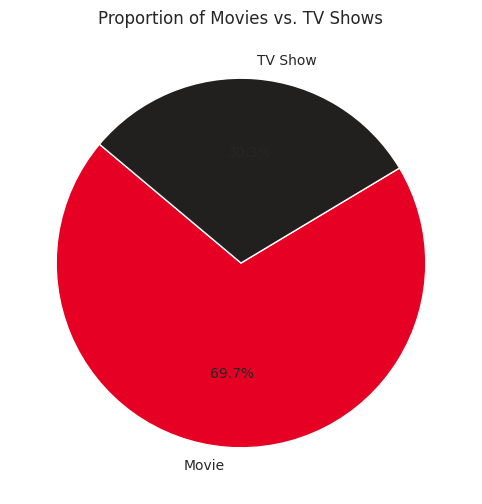

In [ ]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

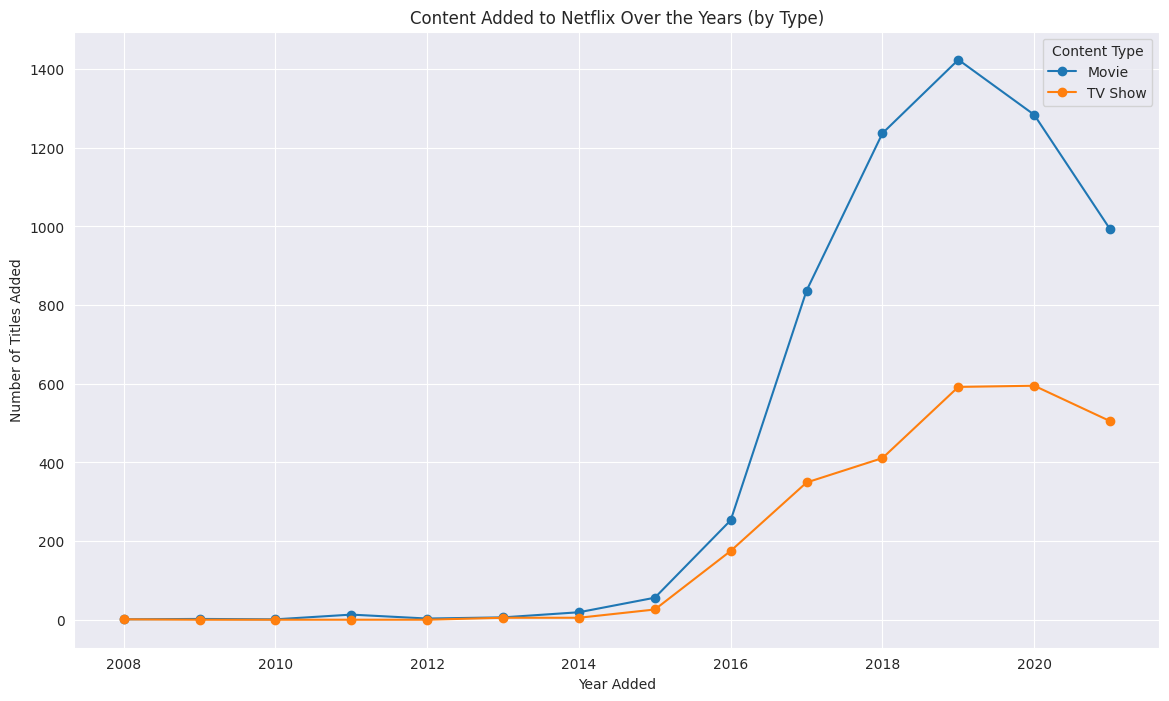

In [ ]:
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


In [ ]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

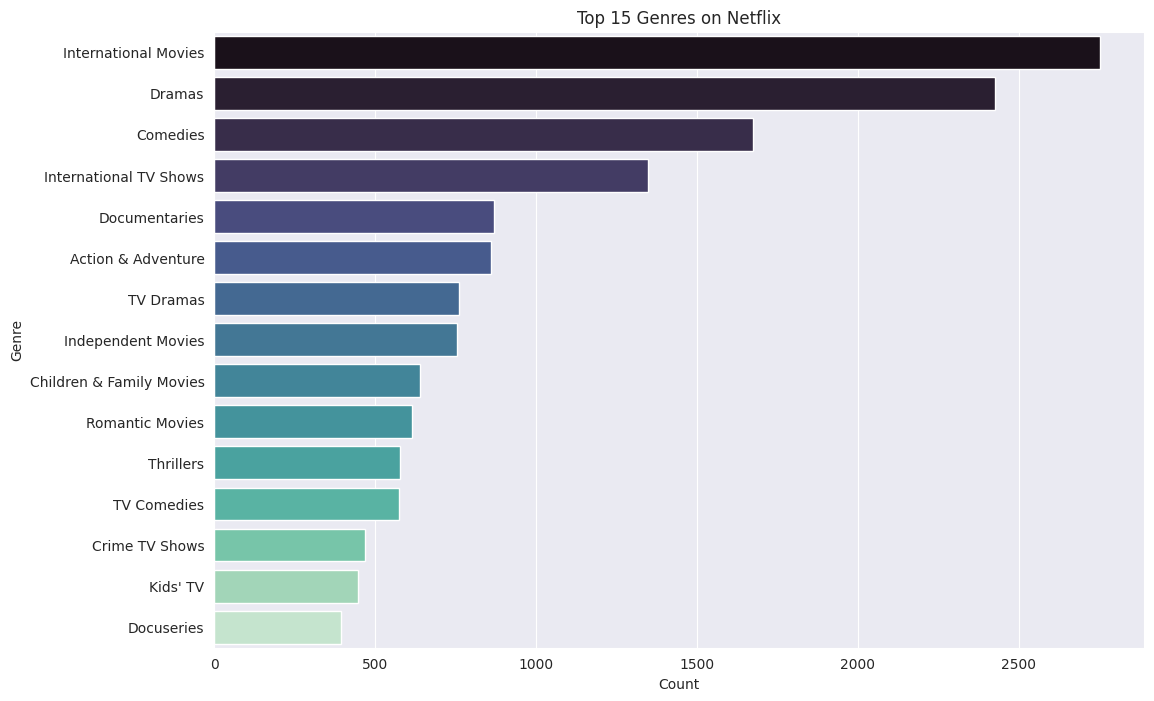

In [ ]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [ ]:
movies_df = movies_df.dropna(subset=['duration'])
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)


In [ ]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

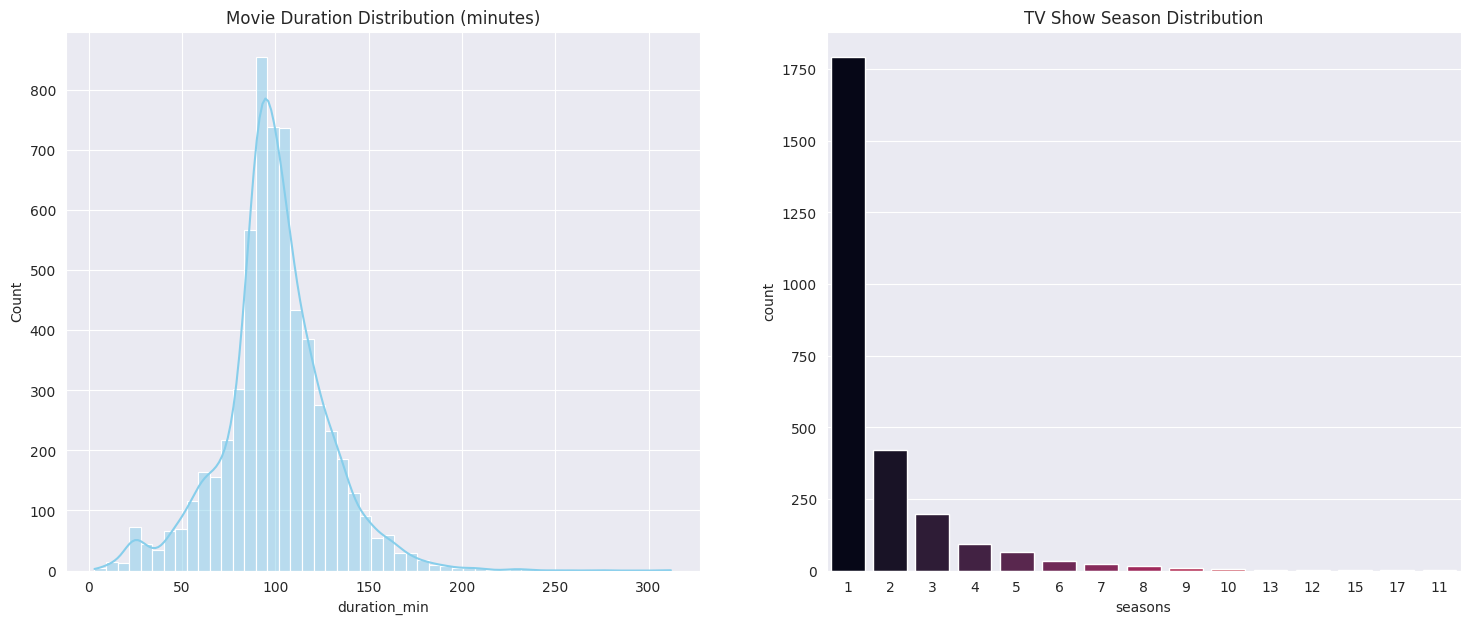

In [ ]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [ ]:
# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [ ]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

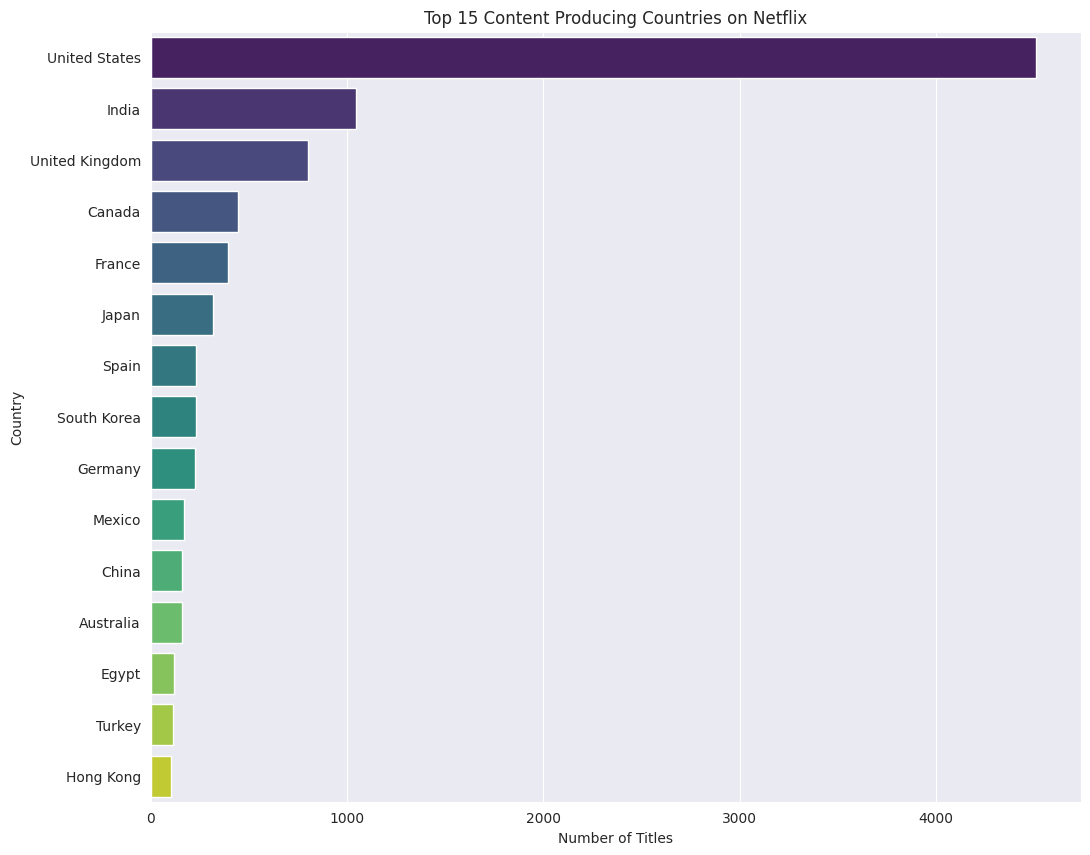

In [ ]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


Maturity rating of content

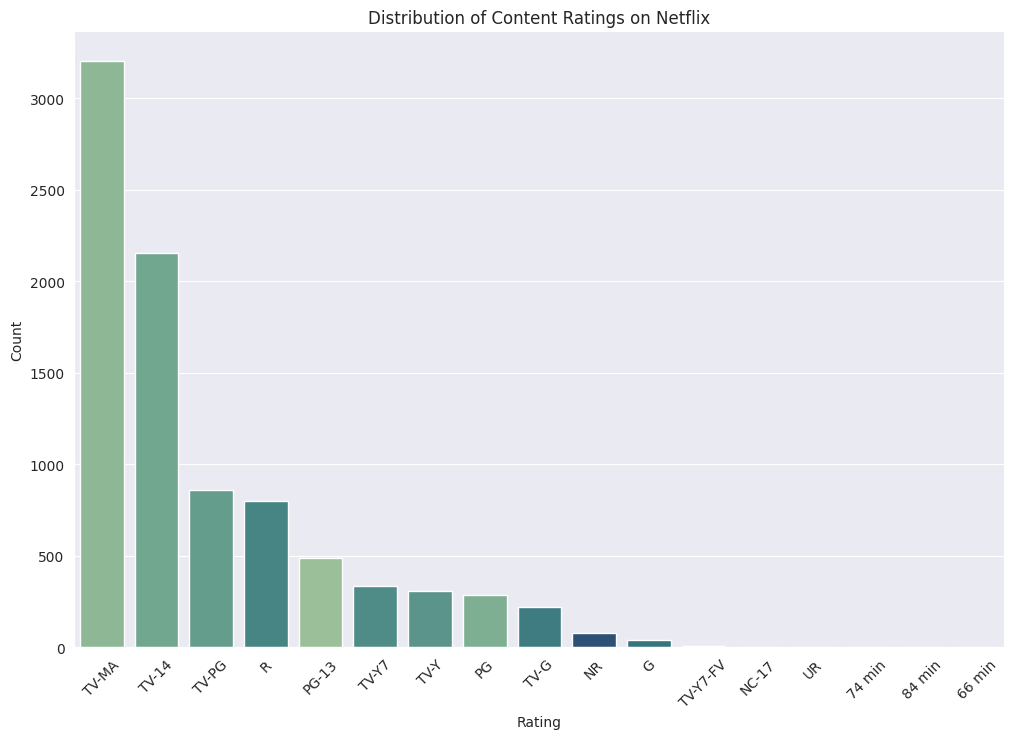

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

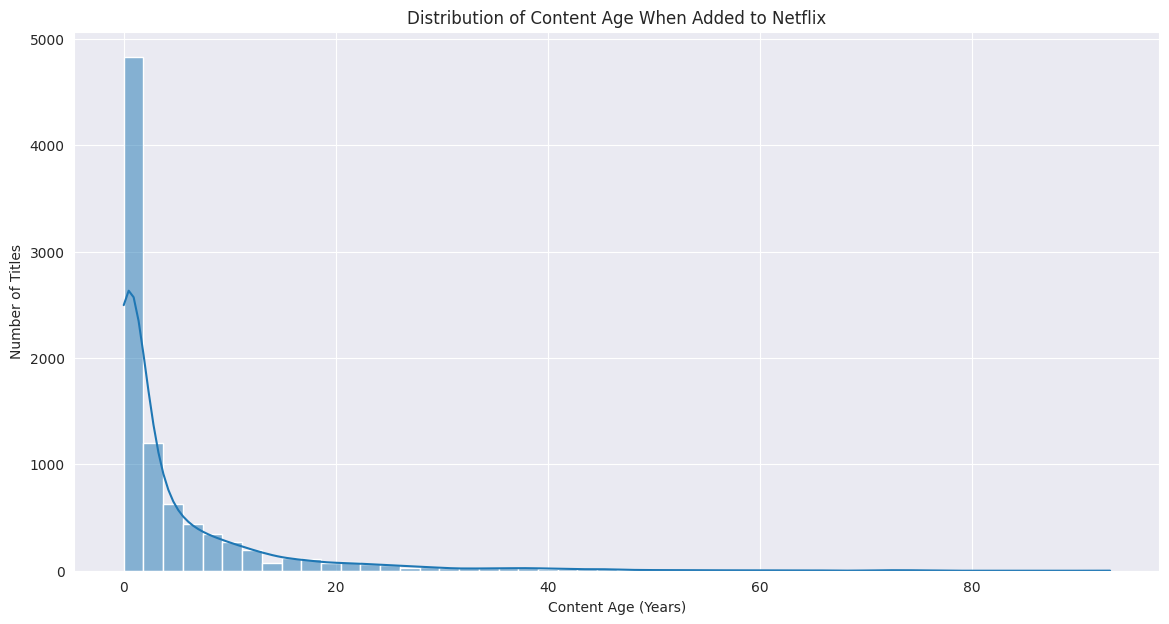

In [ ]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

Deeper Maltivariate Analysis

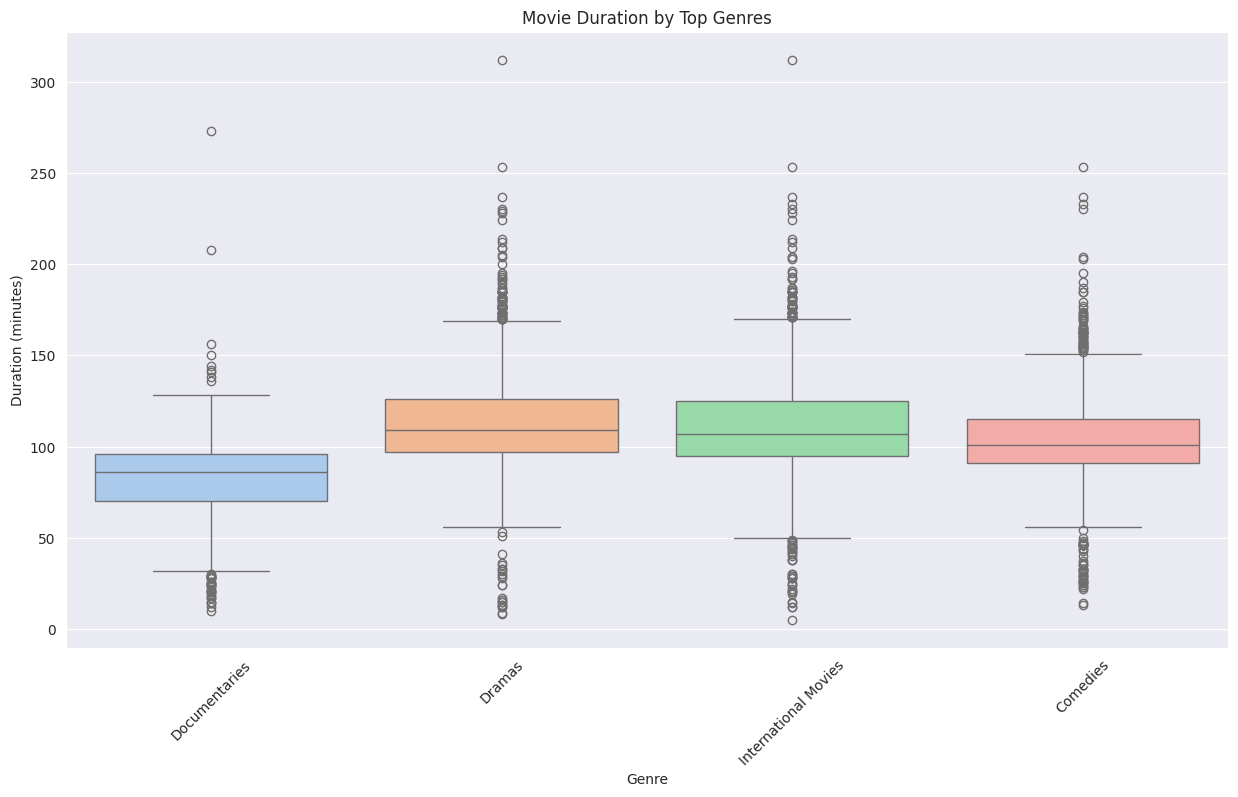

In [ ]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

Word cloud from content Descriptions

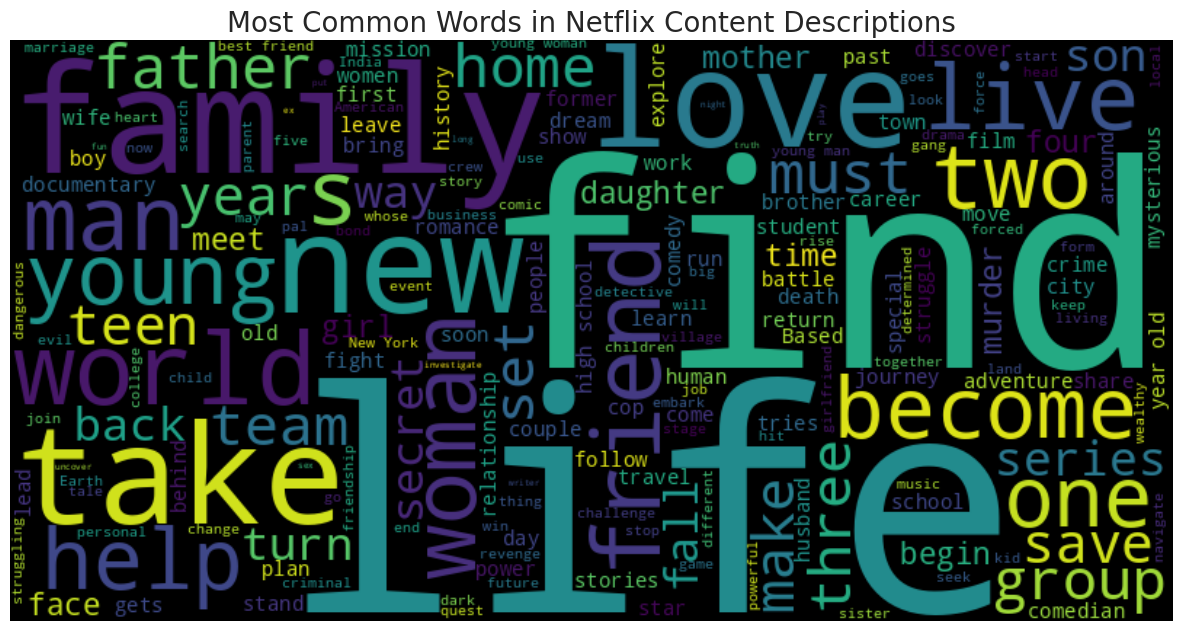

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Submission Q's
* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

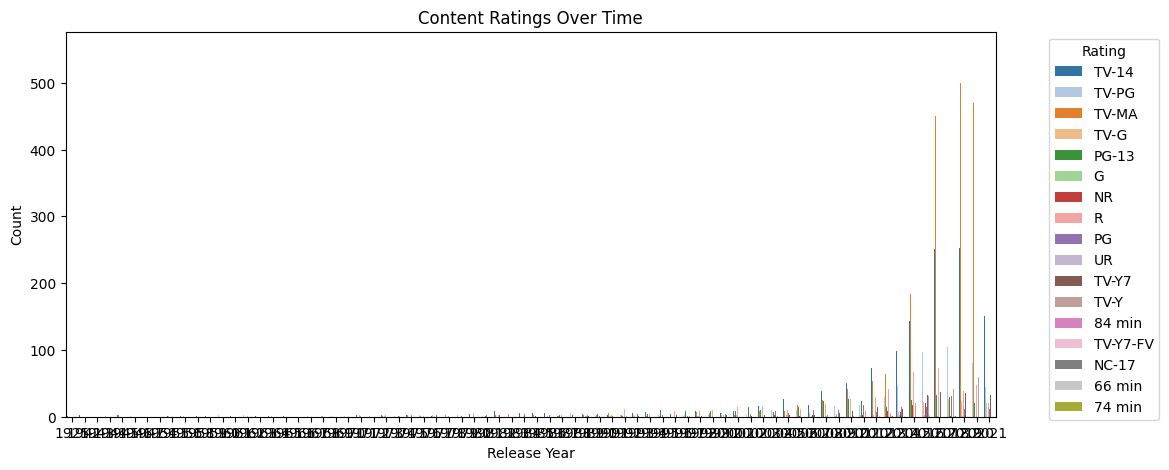

In [ ]:
# ===============================
# Q1: Distribution of Content Ratings Over Time
# ===============================
plt.figure(figsize=(12,5))
sns.countplot(data=netflix_df, x='release_year', hue='rating', palette='tab20')
plt.title("Content Ratings Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05,1), title="Rating")
plt.show()

/tmp/ipython-input-3636703632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=netflix_df, x='type', y='content_age', palette='pastel')


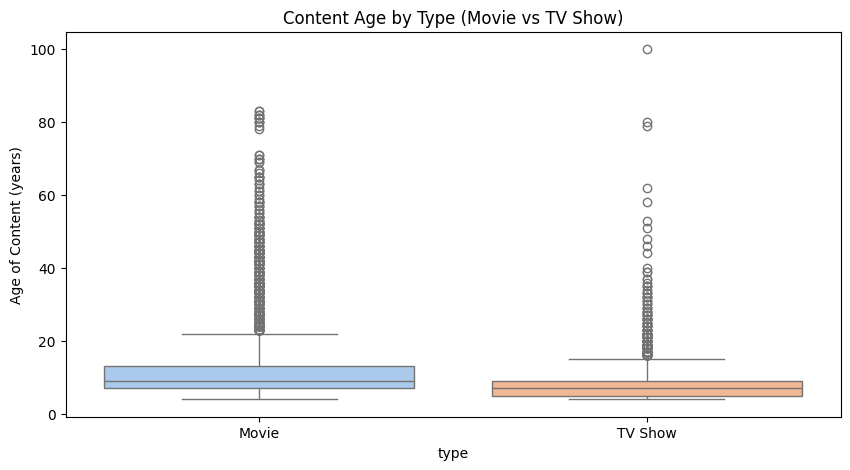

In [ ]:
# ===============================
# Q2: Relationship Between Content Age and Type
# ===============================
# Age = Current Year - Release Year
current_year = 2025
netflix_df['content_age'] = current_year - netflix_df['release_year']

plt.figure(figsize=(10,5))
sns.boxplot(data=netflix_df, x='type', y='content_age', palette='pastel')
plt.title("Content Age by Type (Movie vs TV Show)")
plt.ylabel("Age of Content (years)")
plt.show()



/tmp/ipython-input-1796695270.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trends['release_year'] = df_trends['release_year'].astype(int)


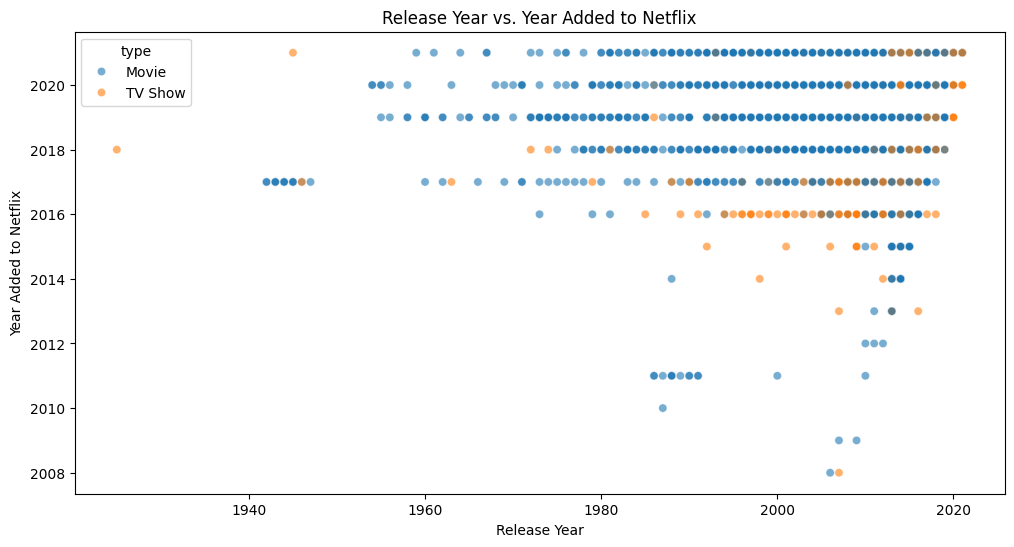

In [ ]:
# ===============================
# Q3: Trends in Content Production
# ===============================
# Scatter plot: release year vs year added

# Step 1: Load the dataset
netflix_df = pd.read_csv("netflix_titles.csv")

# Step 2: Convert 'date_added' to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Step 3: Extract the year content was added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Step 4: Drop rows with missing values for year_added or release_year
df_trends = netflix_df.dropna(subset=['year_added', 'release_year'])

# Step 5: Ensure release_year is numeric
df_trends['release_year'] = df_trends['release_year'].astype(int)

# Step 6: Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_trends, x='release_year', y='year_added', hue='type', alpha=0.6)
plt.title("Release Year vs. Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()


In [ ]:
# ===============================
# Q4: Most Common Word Pairs/Phrases in Descriptions
# ===============================
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Filter out stopwords
filtered_descriptions = []
for desc in descriptions:
    words = [w for w in desc.split() if w not in stop_words]
    filtered_descriptions.append(words)

# Get word pairs again
word_pairs = Counter()
for words in filtered_descriptions:
    pairs = list(zip(words, words[1:]))
    word_pairs.update(pairs)

# Top 10 meaningful word pairs
top_pairs = word_pairs.most_common(10)
print("Top 10 meaningful word pairs in descriptions:")
for pair, count in top_pairs:
    print(f"{pair[0]} {pair[1]} : {count}")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 10 meaningful word pairs in descriptions:
high school : 140
young man : 108
young woman : 103
new york : 95
best friends : 60
true story : 57
world war : 51
based true : 49
best friend : 49
standup special : 48


In [ ]:
#Q'
from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams from descriptions
descriptions = netflix_df['description'].dropna().astype(str)

# Get top bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=2000)
X = vectorizer.fit_transform(descriptions)
sums = X.sum(axis=0).A1

bigrams = [(word, sums[idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)[:20]

# Show top bigrams
for phrase, freq in bigrams:
    print(phrase, freq)




year old 145
high school 145
young woman 111
young man 110
new york 98
small town 66
best friend 57
true story 57
best friends 54
world war 52
based true 50
los angeles 47
stand special 47
war ii 44
documentary follows 42
york city 41
falls love 40
social media 36
documentary series 36
martial arts 36


Top 10 directors on Netflix:
 director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


/tmp/ipython-input-1892811525.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


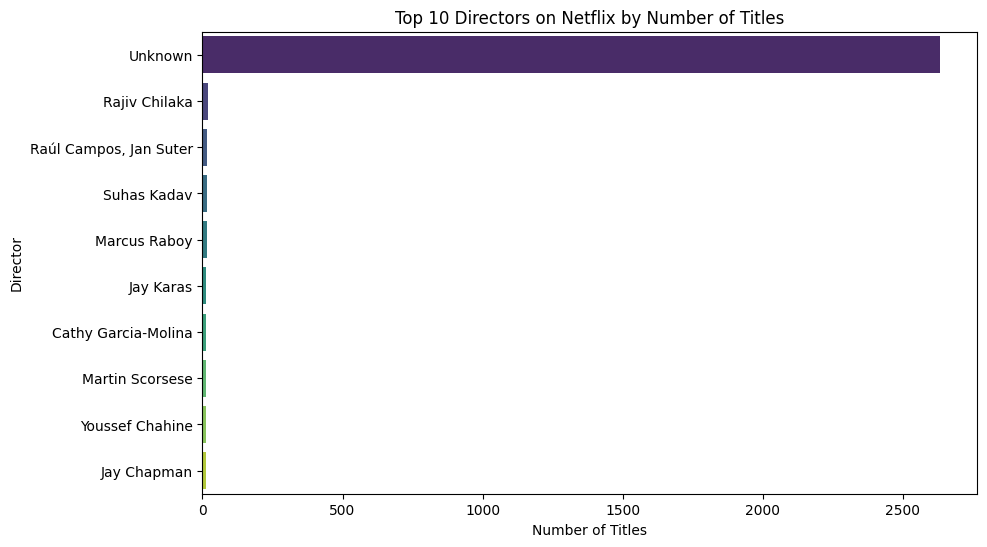

In [ ]:
# ===============================
# Q5: Who are the top directors on Netflix?
# ===============================

# Fill missing director names with 'Unknown'
netflix_df['director'] = netflix_df['director'].fillna('Unknown')

#Count number of titles per director
director_counts = netflix_df['director'].value_counts()

# Get top 10 directors
top_directors = director_counts.head(10)
print("Top 10 directors on Netflix:\n", top_directors)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title("Top 10 Directors on Netflix by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()
